<a href="https://colab.research.google.com/github/joshuaidumijie/Hamoye-Internship-2020/blob/master/Stage_B_Hamoye_Joshua_Idumijie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stage B by Joshua Idumijie

From the instructions attached to the data sets, the following objectives were postulated:
* Normalise the Data using the MinMAxScaler, remove the Date and Lights columns(as this will increase noise in our data)
* The Target Variable(y) is 'Appliances'
* Use a 70-30 train-test set split with a random state of 42(for reproducibility)
* Run a multiple linear regression sing the training set and 
*  Evaluate the model on the test set.

It should also be noted that two random data were added.

The following steps will be utilised:
* Import the packages and classes in I need.
* Provide Energy Data set(Appliance) and carry out appropriate transformation.
* Create a regression model and fit it with test set
* Check the results of the model to see if it's satisfactory
* Apply the model for predictions using the test set.    

###Data Set Description









Attribute, Information:
* *Date, time year-month-day hour:minute:second*
* *lights, energy use of light fixtures in the house in Wh*
***Appliances, energy use in Wh** 
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chievres weather station), in Celsius
* Pressure (from Chievres weather station), in mm Hg
* RH_out, Humidity outside (from Chievres weather station), in %
* Wind speed (from Chievres weather station), in m/s
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), Â °C
* rv1, Random variable 1, nondimensional
* rv2, Random variable 2, nondimensional



###Importing necessary packages

In [13]:
# importing required packages

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot  as plt;

###Data Preparation and Cleaning

In [14]:
# increasing the number of viewable columns to allow easy manual exploration
pd.options.display.max_columns = 30

In [15]:
# loading the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
dfe = pd.read_csv(url,error_bad_lines=False)
dfe.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.2,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [16]:
# to check the type of data set and if any columns contain a null value
dfe.info()

#all columns have the same number of non-null, so that implies no null value
#alternatively 

dfe.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [17]:
#Checking for any duplicates
dfe.duplicated().any()

#no duplicates

False

In [18]:
#checking the shape of the data    
dfe.shape

(19735, 29)

###Explanotory Data Analysis

In [19]:
#brief statistical description of data set
dfe.describe( include = 'all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-02-28 03:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


The following can be inferred
* The date and lights columns will be noises if added to our model
* The large deviation of values of pressure columns and temperature will affect our results negatively, the data set will have to be normalised.


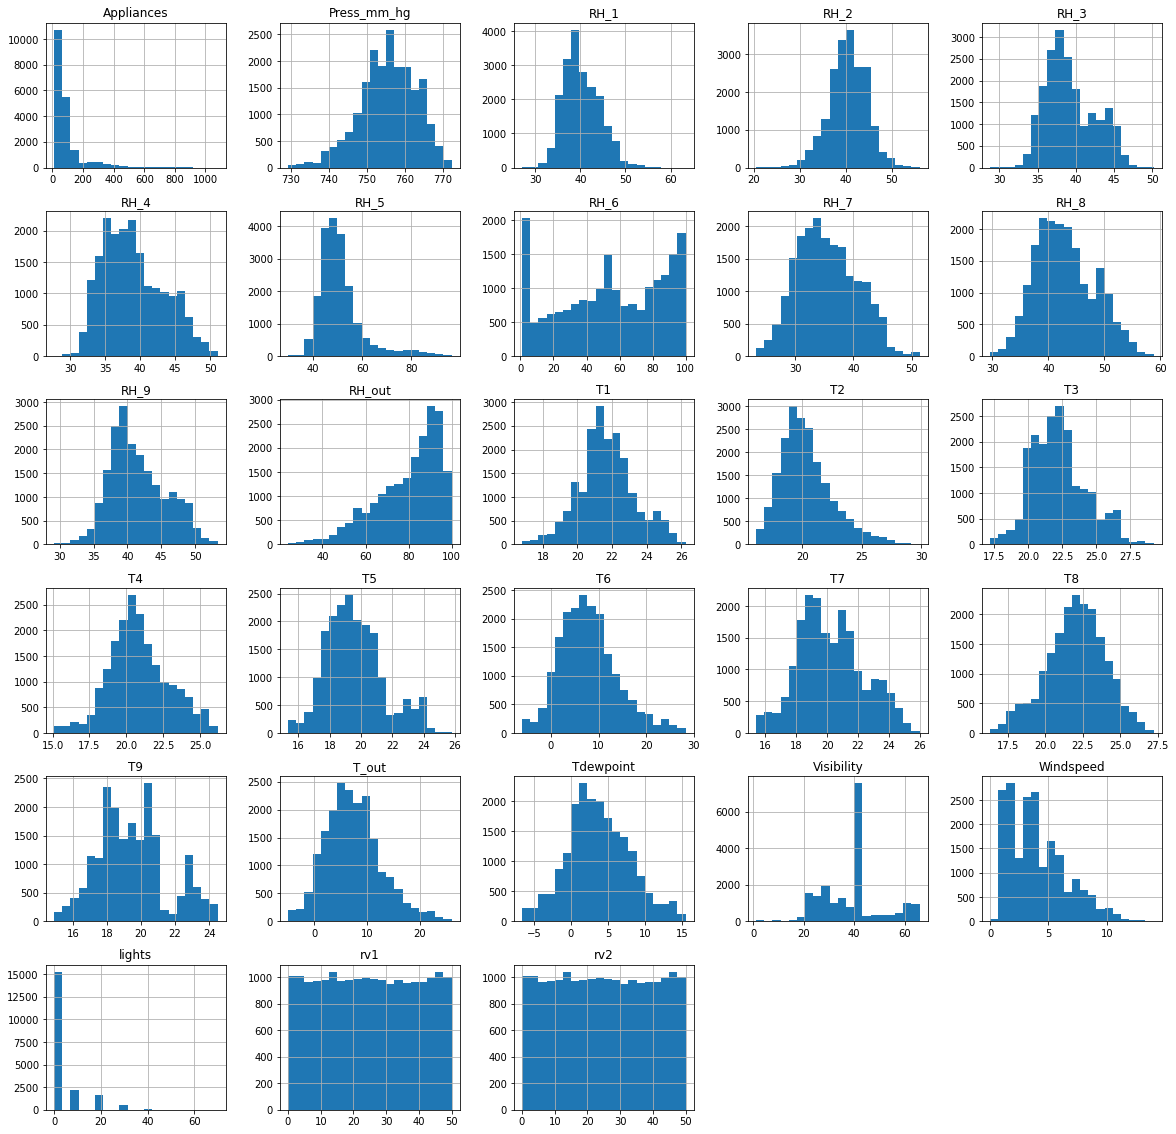

In [9]:
# lets visualize the histogram of all the features to understand the  distribution
dfe.hist(bins=20, figsize=(20,20));

The results show that lights along with dates should be removed. 
Some features are relatively normally distributed, others skewed...
* The random data features that were added seem to be platykurtic(kurtosis greater than -1)


###The Modelling

In [20]:
# dropping the lights column
dfe.drop(['lights'], axis=1,inplace=True)
# dropping the date column 
dfe.drop(['date'], axis=1, inplace=True)
dfe.shape

(19735, 27)

In [21]:
#Normalising our dataset to a common scale using the min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_dfe = pd.DataFrame(scaler.fit_transform(dfe), columns=dfe.columns)
#PREDICTORS
features_dfe = normalised_dfe.drop(columns=['Appliances'])
#TARGET
target_dfe = normalised_dfe['Appliances']


In [22]:
#to check the features columnns
features_dfe.head(2)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.50000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.47619,0.894872,0.533937,0.372083,0.372083


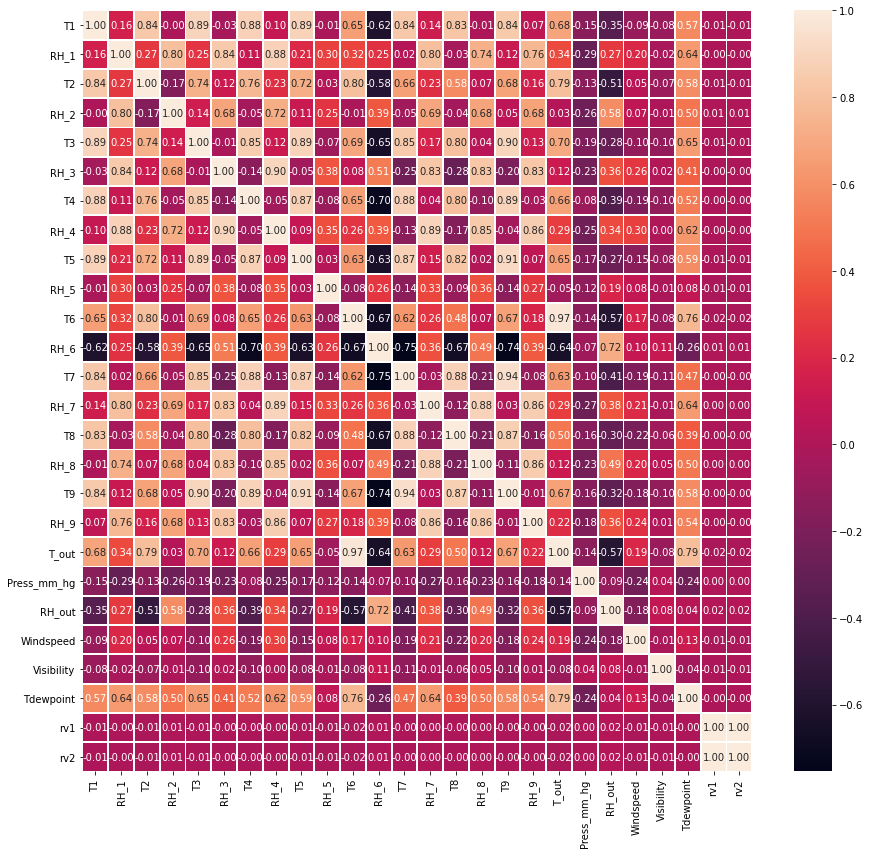

In [23]:
f ,ax = plt.subplots(figsize = (15,14))
sns.heatmap(features_dfe.corr(), annot = True, linewidth= 0.8, fmt = '.2f', ax = ax);

In [24]:
# splitting data into training and testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_dfe, target_dfe, test_size = 0.3, random_state = 42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

In [26]:
#checking few results
r_sq = linear_model.score(x_train,y_train)
print('coefficient of determination:', r_sq)
print(linear_model.intercept_)
print(linear_model.coef_)

coefficient of determination: 0.14471942308518737
0.1529029588225302
[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [27]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.05

In [28]:
#for RSS
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.149

In [29]:
#For the RMSE
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)	   

45.348

In [30]:
#For the R-Squared

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [31]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train);

In [77]:
#Question 20
#obtain predictions

#obtain predictions
predicted_values_lasso = lasso_reg.predict(x_test)

In [78]:
#For the RMSE
import numpy as np
rss = np.sum(np.square(y_test - predicted_values_lasso))
round(rss, 3)	

51.853

In [32]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train);

In [73]:
#Quiz Question 18
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train);

#obtain predictions
predicted_values_ridge = ridge_reg.predict(x_test)

In [74]:
#For the RMSE
import numpy as np
rss = np.sum(np.square(y_test - predicted_values_ridge))
round(rss, 3)	

45.368

In [33]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [34]:
#linear model
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

In [35]:
#Ridge and Lasso weights
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [36]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


###Alternatively

In [37]:
# importing the necessary algorithms
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of the different algorithms 
models = {'Ridge': Ridge(),'Lasso': Lasso(),'ElasticNet':ElasticNet(),'LinearRegression':LinearRegression(),'KNeighborsRegressor':KNeighborsRegressor(),'RandomForestRegressor':RandomForestRegressor(),'ExtraTreesRegressor':ExtraTreesRegressor(),'GradientBoostingRegressor':GradientBoostingRegressor(),'DecisionTreeRegressor':DecisionTreeRegressor()}

In [38]:
# funtion to compute the scores, evaluation metrics on the training and testing set

def pipeline(models, x_train, x_test, y_train, y_test):
    """
    This function iteratively goes through all the models defined in the dictionary and 
    computes the Train_score, Test_score, MSE, MAE and RMSE.
    
    Parameters: model, training set(x_train), test_set(x_test), train_labels(y_train), and test_labels(y_test).
    
    Returns: This funtion returns a dataFrame containing calculations of each models and also plots bar
            chart showing how each models performs.
            (courtesy of a fellow intern:Samuel)
    """
    
    # store properties of each model
    prop_dfe = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(x_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(x_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(x_test, y_test)
        # compute the mean_absolute_error
        reg_dict['MAE'] = mean_absolute_error(y_test, regressor.predict(x_test))
        #compute the mean_squared_error
        reg_dict['MSE'] = mean_squared_error(y_test, regressor.predict(x_test))
        # compute the RMSE
        reg_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, regressor.predict(x_test)))
        # append the properties of a single regressor to the prop list
        prop_dfe.append(reg_dict)
     
    # create a dataframe with a list of all the model properties
    summary_df = pd.DataFrame(prop_dfe)
    
    # plot a bar chart to visualize the performance of each model
    summary_df.plot(x='Name', y=['Train_score', 'Test_score', 'MAE', 'MSE', 'RMSE'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')
        
        
    return summary_df

,Name,Train_score,Test_score,MAE,MSE,RMSE
0,Ridge,0.143766,0.147535,0.050069,0.007671,0.087585
1,Lasso,0.000000,-0.000001,0.056523,0.008999,0.094862
2,ElasticNet,0.000000,-0.000001,0.056523,0.008999,0.094862
3,LinearRegression,0.144719,0.148902,0.050134,0.007659,0.087514
4,KNeighborsRegressor,0.544932,0.271799,0.040243,0.006553,0.080950
5,RandomForestRegressor,0.935958,0.558504,0.030233,0.003973,0.063031
6,ExtraTreesRegressor,1.000000,0.620370,0.027159,0.003416,0.058448
7,GradientBoostingRegressor,0.337396,0.243112,0.045398,0.006811,0.082529
8,DecisionTreeRegressor,1.000000,0.171866,0.036599,0.007452,0.086326


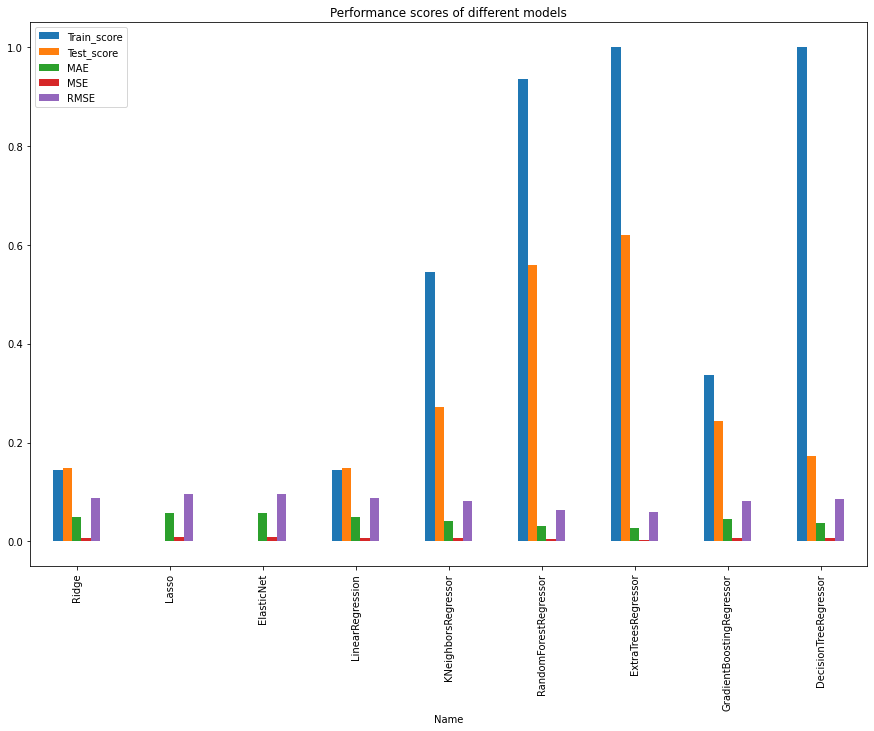

In [39]:
# execute the function
pipeline(models, x_train, x_test, y_train, y_test)

The other recommended methods: Model Tuning and choosing parameters
Random Search &Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# define the param grid
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [10, 50, 100, 200, 250],
              'max_features': ["auto", "sqrt", "log2"]
            }]

reg = ExtraTreesRegressor(random_state=42)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(reg, param_grid, cv = 6, n_jobs = -1 , scoring='r2' , verbose=2)

# fit the gridserch model
grid_search.fit(x_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.3min finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [41]:
# check for the best param fot the ExtraTreeReggressor

print(f'best param of the ExtraTreeRegressor is: {grid_search.best_params_}')

best param of the ExtraTreeRegressor is: {'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 80}


In [42]:
# Best possible estimator for ExtraTreesRegressor

best_model = grid_search.best_estimator_

print(f'print R2_score on training_set with tuned parameters: {best_model.score(x_train, y_train)}')
print(f'print R2_score on testing_set with tuned parameters: {round(best_model.score(x_test, y_test), 3)}')
print(f'print MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, best_model.predict(x_test)), 3)}')
print(f'print RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, best_model.predict(x_test))), 3)}')

print R2_score on training_set with tuned parameters: 1.0
print R2_score on testing_set with tuned parameters: 0.627
print MSE_score on testing_set with tuned parameters: 0.003
print RMSE_score on testing_set with tuned parameters: 0.058


In [43]:
# instantiate the Grid params
param_grid = [
 {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10],
  'max_depth':[10, 15]},
 {'bootstrap': [False], 'n_estimators': [1, 3, 10], 'max_features': [2, 3, 4]},
 ]

# instantiate the random forest regressor
forest_reg = RandomForestRegressor()

# instantiate the grid serch
grid_search = GridSearchCV(forest_reg, param_grid, cv=6, scoring='r2')

# fit the grid search on training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [44]:
# get best params
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [45]:
# get best model
model = grid_search.best_estimator_

In [46]:
print(f'print R2_score on training_set with tuned parameters: {model.score(x_train, y_train)}')
print(f'print R2_score on testing_set with tuned parameters: {round(model.score(x_test, y_test), 3)}')
print(f'print MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, model.predict(x_test)), 3)}')
print(f'print RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, model.predict(x_test))), 3)}')

print R2_score on training_set with tuned parameters: 1.0
print R2_score on testing_set with tuned parameters: 0.572
print MSE_score on testing_set with tuned parameters: 0.004
print RMSE_score on testing_set with tuned parameters: 0.062


In [47]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

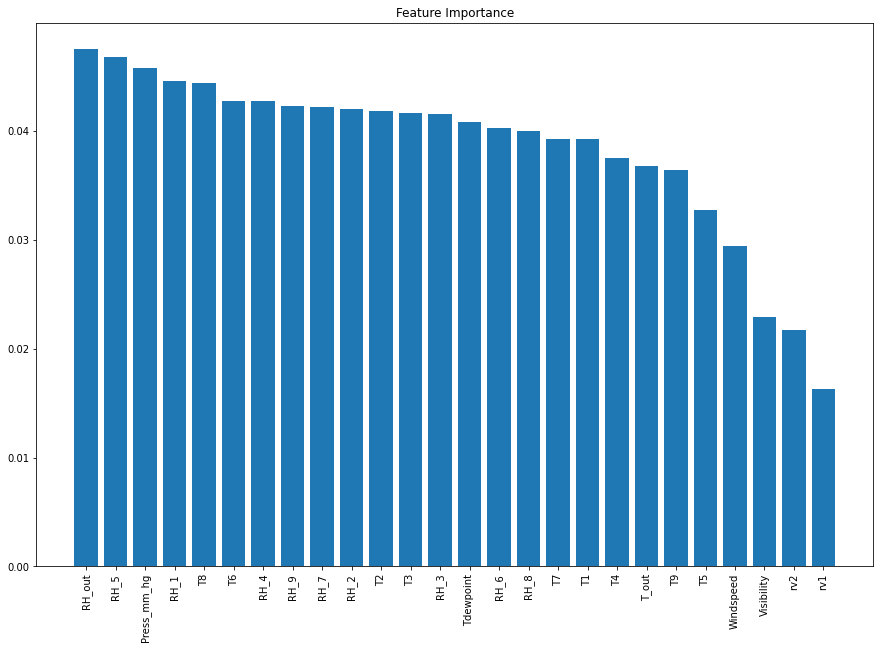

In [48]:
feature_importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names_features = [x_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(15, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x_train.shape[1]), feature_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names_features, rotation=90)

# Show plot
plt.show()

In [ ]:
# Get top 10 most important feature 
names_features[0:10]

In [50]:
# calculating the percentage of appliance enegry consumption less than 200 wh

print(f" Percentage of the appliance energy consumption less than 200 Wh is: {round((dfe[dfe['Appliances'] <= 200]['Appliances'].count()) / len(dfe['Appliances']) * 100, 2)}%")

 Percentage of the appliance energy consumption less than 200 Wh is: 90.29%


##Stage B QUIZ

In [51]:
print('I am ready')

I am ready


In [57]:
xx = pd.DataFrame(features_dfe['T2'])
xx.shape

(19735, 1)

In [58]:
yy = pd.Series(features_dfe['T6'])
yy.shape

(19735,)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(xx, yy)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# splitting data into training and testing set

from sklearn.model_selection import train_test_split

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size = 0.3, random_state = 42)

In [60]:

#obtain predictions
predicted_values = linear_model.predict(xx_test)

In [61]:
#For the R-Squared

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(yy_test, predicted_values))
round(rmse, 2)

37.07

In [62]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yy_test, predicted_values)
round(mae, 2) 

37.07

In [64]:
#for RSS
from sklearn.metrics import r2_score
r2_score = r2_score(yy_test, predicted_values)
round(r2_score, 2)

-43964.62

In [65]:
#For the RMSE
import numpy as np
rss = np.sum(np.square(yy_test - predicted_values))
round(rss, 3)	   

8137292.799

In [67]:
r_sq = linear_model.score(xx_train,yy_train)
print('coefficient of determination:', round(r_sq,3))

coefficient of determination: -43630.749


In [75]:
#Quiz Question 18
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg_xy = Ridge(alpha=0.4)
ridge_reg_xy.fit(xx_train, yy_train);

#obtain predictions
predicted_values_ridge_xy = ridge_reg_xy.predict(xx_test)

In [76]:
#For the RMSE
import numpy as np
rss = np.sum(np.square(yy_test - predicted_values_ridge_xy))
round(rss, 3)	

66.116